In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from ipywidgets import interact
from PIL import Image

print(tf.VERSION)
print(keras.__version__)

Epoch 1/3
60000/60000 [==============================] - 4s 68us/step - loss: 0.2592 - acc: 0.9266
Epoch 2/3
60000/60000 [==============================] - 4s 66us/step - loss: 0.1145 - acc: 0.9660
Epoch 3/3
10000/10000 [==============================] - 0s 29us/step


(0.08603751617474481, 0.9725)

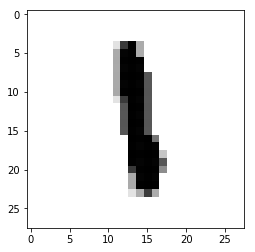

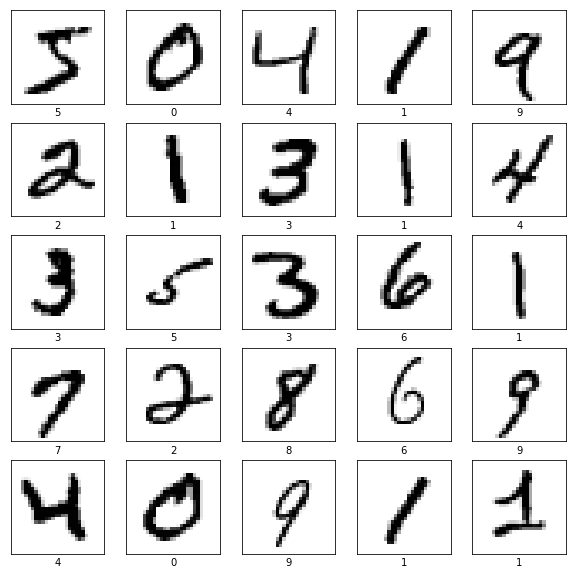

In [8]:

# Answer 1 Start
#---------------------------------------------------------------
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()
train_images.shape
plt.imshow(train_images[200], cmap='binary')

#generate a list [0,1,2,....9]
output_labels = list(sorted(set(train_labels)))

# normalize the data
train_images = train_images / 255.0
test_images = test_images / 255.0

# plot sample data
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap='binary')
    plt.xlabel(train_labels[i])
    
#build the model
model=keras.models.Sequential([
        keras.layers.Flatten(input_shape=train_images[i].shape),
        keras.layers.Dense(128, activation=tf.nn.relu),
        keras.layers.Dense(10, activation=tf.nn.softmax)
    ])

#compile the model
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
              #loss='mean_squared_error',
             metrics=['accuracy'])

#fit the model
model.fit(train_images, train_labels, epochs=3)

#run the model on the test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_loss, test_acc

# Answer 1 Ends
#---------------------------------------------------------------



In [23]:
#Answer 2 Start
#---------------------------------------------------------------

#2.a start-------------------------------------------
model=keras.models.Sequential([
        keras.layers.Flatten(input_shape=train_images[i].shape),
        keras.layers.Dense(4, activation=tf.nn.relu),
        keras.layers.Dense(10, activation=tf.nn.softmax)
    ])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
              #loss='mean_squared_error',
             metrics=['accuracy'])

#fit the model
model.fit(train_images, train_labels, epochs=3)

#run the model on the test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_loss, test_acc

# It can be seen that increasing the number of nodes in the hidden layer
# increases the test accuracy but also increases the time taken to train the mode.
# For nodes=4, accuracy is about 85% and time taken about 6s ; for nodes > 128,
# accuracy saturates to about 98%. Increasing nodes to more than 128 doesn't have 
# much impact on accuracy, although the time taken to train increases
# considerably (from 15s for n=128 to 84s for n=1024)

# 2.a End------------------------------------------- 

Epoch 1/3
60000/60000 [==============================] - 5s 90us/step - loss: 0.2566 - acc: 0.9270
Epoch 2/3
60000/60000 [==============================] - 5s 77us/step - loss: 0.1134 - acc: 0.9668
Epoch 3/3
10000/10000 [==============================] - 1s 63us/step


(0.08554547229409218, 0.9739)

In [28]:
#2.b start-------------------------------------------
model=keras.models.Sequential([
        keras.layers.Flatten(input_shape=train_images[i].shape),
        keras.layers.Dense(128, activation=tf.nn.relu),
        keras.layers.Dense(1, activation=tf.nn.softmax)
    ])

model.compile(optimizer='adam',
             #loss='sparse_categorical_crossentropy',
              #loss='mean_squared_error',
              loss='categorical_hinge',
             metrics=['accuracy'])

#fit the model
model.fit(train_images, train_labels, epochs=3)

#run the model on the test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_loss, test_acc

#2.b End-------------------------------------------

Epoch 1/3
60000/60000 [==============================] - 6s 94us/step - loss: 0.1974 - acc: 0.1124
Epoch 2/3
60000/60000 [==============================] - 5s 77us/step - loss: 0.1974 - acc: 0.1124
Epoch 3/3
10000/10000 [==============================] - 1s 59us/step


(0.196, 0.1135)

In [46]:
#2.c start-------------------------------------------
model=keras.models.Sequential([
        keras.layers.Flatten(input_shape=train_images[i].shape),
        keras.layers.Dense(128, activation=tf.nn.relu),
        keras.layers.Dense(10, activation=tf.nn.softmax)
    ])

model.compile(#optimizer='adam',
             #optimizer='sgd',
            #optimizer='nadam',
              optimizer='adadelta',
             loss='sparse_categorical_crossentropy',
              #loss='mean_squared_error',
             metrics=['accuracy'])

#fit the model
model.fit(train_images, train_labels, epochs=3)

#run the model on the test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_loss, test_acc


#For n=128 hidden layer, 'nadam' (98%), 'adam'(97%) and 'adadelta'(97%) provide much better accuracy
# than 'sgd'(90%) optimizer
#2.c end-------------------------------------------

Epoch 1/3
60000/60000 [==============================] - 8s 129us/step - loss: 0.2695 - acc: 0.9238
Epoch 2/3
60000/60000 [==============================] - 6s 96us/step - loss: 0.1311 - acc: 0.9617
Epoch 3/3
10000/10000 [==============================] - 1s 134us/step


(0.1050551835756749, 0.9699)

In [57]:
#2.e start-------------------------------------------
model=keras.models.Sequential([
        keras.layers.Flatten(input_shape=train_images[i].shape),
        keras.layers.Dense(128, activation=tf.nn.relu),
        keras.layers.Dense(10, activation=tf.nn.softmax)
    ])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

#fit the model
model.fit(train_images, train_labels, epochs=1)

#run the model on the test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_loss, test_acc

# For n=128 hidden layer, the accuracy improves from 92% (epochs=1)
# 99% (epochs=10). The 99% accuracy could mean we are over fitting the 
# model though.
#2.e end-------------------------------------------

Epoch 1/3
60000/60000 [==============================] - 3s 54us/step - loss: 1.6138 - acc: 0.5625
Epoch 2/3
60000/60000 [==============================] - 1s 9us/step - loss: 0.6876 - acc: 0.8409
Epoch 3/3
10000/10000 [==============================] - 2s 166us/step


(0.37171203162670136, 0.9003)

In [59]:
#2.f start-------------------------------------------
model=keras.models.Sequential([
        keras.layers.Flatten(input_shape=train_images[i].shape),
        keras.layers.Dense(128, activation=tf.nn.relu),
        keras.layers.Dense(10, activation=tf.nn.softmax)
    ])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

#fit the model
model.fit(train_images, train_labels, epochs=3, batch_size=4086)

#run the model on the test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_loss, test_acc


# A higher batch size decreases the time to train the network,
# though the accuracy is lower.
# for example, batch_size=8 (time=65s, accuracy=97%);
# batch_size=4096 (time=4s, accuracy=87%)
#2.f end-------------------------------------------



Epoch 1/3
60000/60000 [==============================] - 3s 57us/step - loss: 1.6343 - acc: 0.5737
Epoch 2/3
60000/60000 [==============================] - 1s 9us/step - loss: 0.6873 - acc: 0.8393
Epoch 3/3
10000/10000 [==============================] - 2s 191us/step


(0.37519794042110444, 0.8967)

In [72]:
#2.g start-------------------------------------------
model=keras.models.Sequential([
        keras.layers.Flatten(input_shape=train_images[i].shape),
        keras.layers.Dense(128, activation=tf.nn.relu),
        keras.layers.Dense(128, activation=tf.nn.relu),
        keras.layers.Dense(10, activation=tf.nn.softmax)
    ])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

#fit the model
model.fit(train_images, train_labels, epochs=3)

#run the model on the test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_loss, test_acc


# Adding an extra hidden layer n=128 doesn't seem to have much
# effect on neither the accuracy nor the time taken.
#2.g end-------------------------------------------



Epoch 1/3
60000/60000 [==============================] - 11s 179us/step - loss: 0.2645 - acc: 0.9257
Epoch 2/3
60000/60000 [==============================] - 6s 108us/step - loss: 0.1171 - acc: 0.9660
Epoch 3/3
10000/10000 [==============================] - 2s 246us/step


(0.08306573158372194, 0.9756)

In [82]:
#2.h start-------------------------------------------
model=keras.models.Sequential([
        keras.layers.Flatten(input_shape=train_images[i].shape),
        keras.layers.Dense(128, activation=tf.nn.relu),
        keras.layers.Dense(128, activation=tf.nn.relu),
        keras.layers.Dense(128, activation=tf.nn.relu),
        keras.layers.Dense(10, activation=tf.nn.softmax)
    ])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

#fit the model
model.fit(train_images, train_labels, epochs=3)

#run the model on the test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_loss, test_acc

# Adding 2 exra layer doesnt seem to have much effect on the
# time taken nor the accuracy of the network
#2.h end-------------------------------------------

Epoch 1/3
60000/60000 [==============================] - 14s 234us/step - loss: 0.2301 - acc: 0.9315
Epoch 2/3
60000/60000 [==============================] - 8s 137us/step - loss: 0.0998 - acc: 0.9689
Epoch 3/3
10000/10000 [==============================] - 3s 322us/step


(0.08448049801387825, 0.9741)

In [ ]:
#Prepare to read the student number
image = Image.open("std_num.JPG")
image

In [ ]:
@interact(left=(0, image.size[0]-2), top=(0, image.size[1]-2), right=(0,image.size[0]-2),
          bottom=(0, image.size[1]-2))
def cropImage(fileName="cropped.png", left=0, top=0, right=image.size[0], bottom=image.size[1]):
    croppedImage = image.crop([left, top, right, bottom])
    plt.close()
    plt.imshow(croppedImage)
    croppedImage.save(fileName)
    plt.show()

In [ ]:
digit = Image.open("cropped.png").resize((28,28))
plt.imshow(digit)
# convert to greyscale
digit = np.array(digit.convert("L"))
#plt.imshow(digit, cmap="binary")

# scale to values between 0 and 1
digit = (np.max(digit) - digit) / (np.max(digit) - np.min(digit))
plt.imshow(digit, cmap="binary")

digit[digit<0.4] = 0
plt.imshow(digit, cmap="binary")

In [30]:
# Predict the digit in the student number
predict_array = model.predict(np.reshape(digit, (1,digit.shape[0], digit.shape[1])),
                    verbose=1)
predict_array
print("Digit recognized = ", output_labels[np.argmax(predict_array)])
#print("Digit recognized = ", np.argmax(predict_array))

#digit.shape

NameError: name 'digit' is not defined

In [ ]:
%reset